In [200]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
image = tf.io.read_file('/content/drive/MyDrive/Photo/kek2.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
image = tf.image.decode_image(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.rgb_to_grayscale(image)

In [212]:
filter_kernel = tf.constant([[1, 1],
                             [1, 0]], dtype=tf.float32)


image = tf.expand_dims(image, axis=3)
filter_kernel = tf.expand_dims(tf.expand_dims(filter_kernel, axis=-1), axis=-1)

In [213]:
filter_kernel

<tf.Tensor: shape=(2, 2, 1, 1), dtype=float32, numpy=
array([[[[1.]],

        [[1.]]],


       [[[1.]],

        [[0.]]]], dtype=float32)>

In [214]:
convolution = tf.nn.conv2d(input=image,
                           filters=filter_kernel,
                           strides=[1, 1, 1, 1],
                           padding='SAME')

In [215]:
output = convolution.numpy()

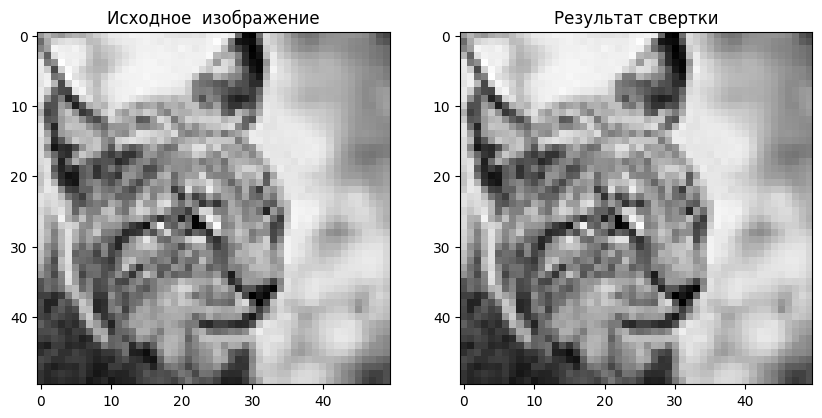

In [216]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(image).numpy(), cmap='gray')
plt.title('Исходное  изображение')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(output), cmap='gray')
plt.title('Результат свертки')

plt.show()